# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import requests
import json
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from random import uniform
import numpy as np
from pprint import pprint
from api_keys import weather_api_key
import time

## Generate Cities List

In [2]:
# Create lists to store city information 
LAT = []
LONG = []
CITIES = {"Name":[], "Latitude":[], "Longitude":[]}

for n in range(4000):
    
    LAT = np.random.uniform(low=-90.000, high=90.000, size=1)
    LONG = np.random.uniform(low=-180.000, high=180.000, size=1)
    city = citipy.nearest_city(LAT, LONG).city_name
    
    if city not in CITIES["Name"]:
        CITIES["Name"].append(city)
        CITIES["Latitude"].append(LAT[0])
        CITIES["Longitude"].append(LONG[0])
        
len(CITIES["Name"])

1213

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# testing

url = "http://api.openweathermap.org/data/2.5/weather?q=" + CITIES["Name"][0] + "&units=imperial&appid=" + weather_api_key
response = requests.get(url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -42.7826, 'lon': 147.0587},
 'dt': 1637048963,
 'id': 2155415,
 'main': {'feels_like': 50.49,
          'humidity': 53,
          'pressure': 1016,
          'temp': 52.99,
          'temp_max': 56.7,
          'temp_min': 49.91},
 'name': 'New Norfolk',
 'sys': {'country': 'AU',
         'id': 2031307,
         'sunrise': 1637001517,
         'sunset': 1637054075,
         'type': 2},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 246, 'gust': 8.01, 'speed': 3}}


In [4]:
LENGTH = len(CITIES["Name"])

CITY = []
COUNTRY = []
LATITUDE = []
LONGITUDE = []
TEMP = []
HUMIDITY = []
CLOUD = []
WIND = []

Reached_Data_Requirement = False

# For Loop

print("-----------------------Start Searching-----------------------")

for n in range(LENGTH):
       
    if n%57 == 0 and n > 0 and Reached_Data_Requirement == False:
        print("----------------------------------------------------------------------------")
        time.sleep(60)
    
    if len(CITY) < 502:

        try:
            
            url = "http://api.openweathermap.org/data/2.5/weather?q=" + CITIES["Name"][n] + "&units=imperial&appid=" + weather_api_key
            response = requests.get(url).json()
            CITY.append(response['name'])
            COUNTRY.append(response['sys']['country'])
            LATITUDE.append(response['coord']['lat'])
            LONGITUDE.append(response['coord']['lon'])
            TEMP.append(response['main']['temp'])
            HUMIDITY.append(response['main']['humidity'])
            CLOUD.append(response['clouds']['all'])
            WIND.append(response['wind']['speed'])

            print(f"Processed Record {n}: {response['name']}, {response['sys']['country']}")
        
        except:
            #print("    ")
            print(f"Processed Record {n}: Not Found ...")
            
    elif len(CITY) == 502 and Reached_Data_Requirement == False: 
        
        print("---------------------------Reached Data Requirement---------------------------")
        Reached_Data_Requirement = True
        
print("---------------------------Finished---------------------------")

-----------------------Start Searching-----------------------
Processed Record 0: New Norfolk, AU
Processed Record 1: Cherskiy, RU
Processed Record 2: Mar del Plata, AR
Processed Record 3: Saint-Philippe, RE
Processed Record 4: Not Found ...
Processed Record 5: Valverde del Camino, ES
Processed Record 6: Hobart, AU
Processed Record 7: Malbork, PL
Processed Record 8: Asău, RO
Processed Record 9: Saskylakh, RU
Processed Record 10: Vaini, TO
Processed Record 11: Caravelas, BR
Processed Record 12: Punta Arenas, CL
Processed Record 13: Sukhumi, GE
Processed Record 14: Thompson, CA
Processed Record 15: Not Found ...
Processed Record 16: Torbay, CA
Processed Record 17: Khatanga, RU
Processed Record 18: Avarua, CK
Processed Record 19: Bredasdorp, ZA
Processed Record 20: Rikitea, PF
Processed Record 21: Prainha, BR
Processed Record 22: Sadovoye, RU
Processed Record 23: Not Found ...
Processed Record 24: Tuktoyaktuk, CA
Processed Record 25: Ürümqi, CN
Processed Record 26: Vardø, NO
Processed Rec

Processed Record 224: Leningradskiy, RU
Processed Record 225: Logansport, US
Processed Record 226: Gorom-Gorom, BF
Processed Record 227: Alyangula, AU
----------------------------------------------------------------------------
Processed Record 228: Severo-Kuril'sk, RU
Processed Record 229: Lakes Entrance, AU
Processed Record 230: Not Found ...
Processed Record 231: Itarema, BR
Processed Record 232: Khromtau, KZ
Processed Record 233: Jamestown, US
Processed Record 234: Bubaque, GW
Processed Record 235: Nikolskoye, RU
Processed Record 236: Not Found ...
Processed Record 237: Tuatapere, NZ
Processed Record 238: Tigil', RU
Processed Record 239: Umm Kaddadah, SD
Processed Record 240: Chern', RU
Processed Record 241: Oddur, SO
Processed Record 242: Lata, PT
Processed Record 243: Pangai, TO
Processed Record 244: Coari, BR
Processed Record 245: Atuona, PF
Processed Record 246: Manicoré, BR
Processed Record 247: Nantucket, US
Processed Record 248: Chitipa, MW
Processed Record 249: La Ronge, CA

Processed Record 447: Sinjai, ID
Processed Record 448: Te Anau, NZ
Processed Record 449: Saint-Joseph, RE
Processed Record 450: Caucaia, BR
Processed Record 451: Sankt Valentin, AT
Processed Record 452: Egvekinot, RU
Processed Record 453: Departamento de Maldonado, UY
Processed Record 454: Malabo, GQ
Processed Record 455: Polson, US
----------------------------------------------------------------------------
Processed Record 456: Kutum, SD
Processed Record 457: Beira, MZ
Processed Record 458: Bilibino, RU
Processed Record 459: Kedrovyy, RU
Processed Record 460: Sitka, US
Processed Record 461: Huandacareo, MX
Processed Record 462: Paysandu, UY
Processed Record 463: Sayyan, YE
Processed Record 464: Agirish, RU
Processed Record 465: Saint Anthony, US
Processed Record 466: Saint-Augustin, CA
Processed Record 467: Marmaris, TR
Processed Record 468: Watrous, CA
Processed Record 469: Dingle, PH
Processed Record 470: Klaksvík, FO
Processed Record 471: Boa Vista, BR
Processed Record 472: Not Fo

In [5]:
len(CITY)

502

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
CITY_df = pd.DataFrame({
    "City": CITY,
    "Country": COUNTRY,
    "Latitude": LATITUDE,
    "Longitude": LONGITUDE,
    "Temperature": TEMP,
    "Humidity": HUMIDITY,
    "Cloud": CLOUD,
    "Wind": WIND,
})

CITY_df.head()

CITY_df.to_csv("city_weather_info.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
CITY_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloud,Wind
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,20.127126,15.270614,55.101255,71.812749,62.209163,8.293466
std,33.773218,90.186631,26.197272,21.528814,38.108811,5.889368
min,-54.800000,-179.166700,-28.550000,9.000000,0.000000,0.000000
25%,-7.254150,-61.291900,36.087500,60.250000,23.250000,4.055000
50%,24.850000,24.042850,62.315000,76.500000,75.000000,7.035000
75%,49.178350,88.348575,77.047500,89.000000,100.000000,11.100000
max,78.218600,178.416700,100.850000,100.000000,100.000000,38.830000


In [8]:
#  Get the indices of cities that have humidity over 100%. There are none.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Skipped as there is none.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

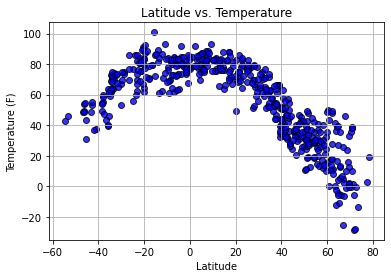

In [10]:
x_values = CITY_df['Latitude']
y_values = CITY_df['Temperature']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Latitude vs. Temperature")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

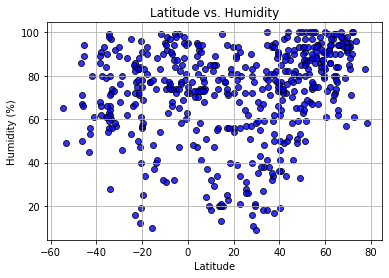

In [11]:
x_values = CITY_df['Latitude']
y_values = CITY_df['Humidity']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

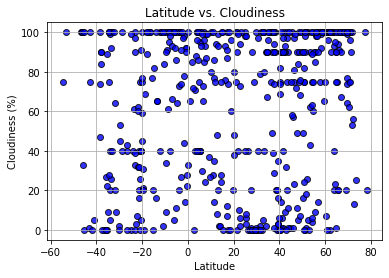

In [12]:
x_values = CITY_df['Latitude']
y_values = CITY_df['Cloud']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

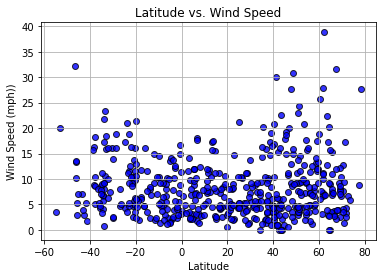

In [13]:
x_values = CITY_df['Latitude']
y_values = CITY_df['Wind']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title("Latitude vs. Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

In [14]:
from scipy import stats

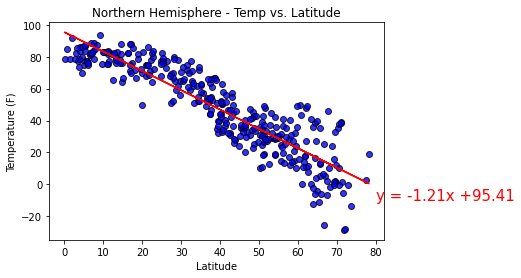

The r-value is: 0.8130785418243462


In [24]:
northern_df=CITY_df[CITY_df['Latitude']>0]
southern_df=CITY_df[CITY_df['Latitude']<0]


equator=CITY_df[CITY_df['Latitude']==0]

x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(80,-10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Northern Hemisphere - Temp vs. Latitude")
plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

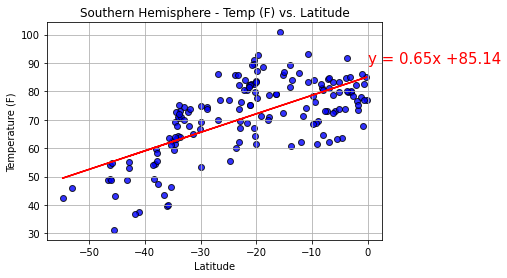

The r-value is: 0.44565569992846277


In [25]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq, (0, 90), fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Southern Hemisphere - Temp (F) vs. Latitude")
plt.grid(True)
plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

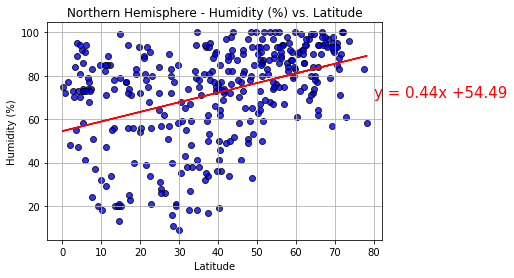

The r-value is: 0.1605697563130623


In [17]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(80,70),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(True)
plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

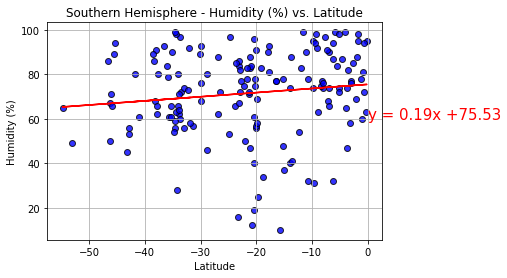

The r-value is: 0.016968360883917073


In [18]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(0,60),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(True)
plt.show()

# Print r value
print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

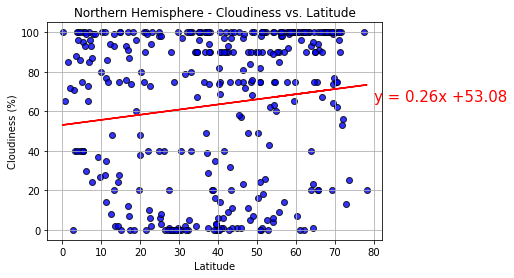

The r-value is: 0.01889912066633046


In [19]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloud']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(80,65),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.grid(True)
plt.show()

# Print r value
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

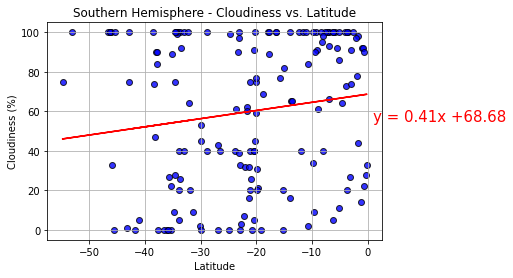

The r-value is: 0.022545428100287524


In [20]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloud']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(1,55),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.grid(True)
plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

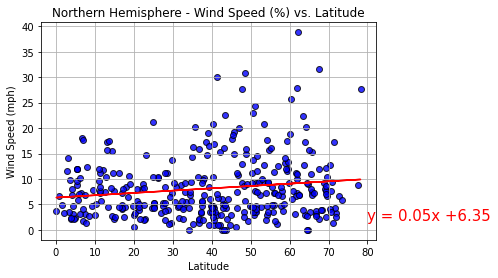

The r-value is: 0.02302853085663046


In [21]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(80,2),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (%) vs. Latitude")
plt.grid(True)
plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

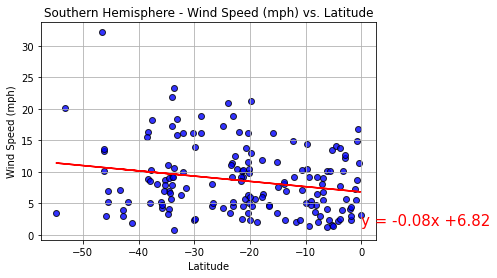

The r-value is: 0.04443229311692463


In [22]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind']
plt.scatter(x_values,y_values, c='blue',norm=0.7, edgecolors ='black', alpha=0.8)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.annotate(line_eq,(0,1.5),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.grid(True)
plt.show()

print(f"The r-value is: {rvalue**2}")

##  Observable Trends

* Temperature are correlated with latitude. In the Northern Hemishere, the higher the latitude, the lower the temperature; while in the Southern Hemisphere, the lower the latitude, the lower the temperature.
* Wind speed has a weak correlation with lattitude.
* There appears to be a almost none or really weak correlation between latitude and cloudiness.